In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
#генерация нормального распределения с пом. Box-Muller Algorithm
def norm_simulate():
    d = 2
    alphas = 0
    while d>1:
        alphas = 2*np.random.uniform(size = 2)-1
        d = np.dot(alphas, alphas)
    r = np.sqrt(-2*np.log(d)/d) # после отбора в круг мы должны выйти
    return r*alphas[0], r*alphas[1] # на окружность, потому нормировка есть в r

In [3]:
#генерация равномерного распределения на (dims - 1)-мерной сфере
def sphere_uniform(dims = 2):
    p, r = divmod(dims, 2)
    normals = np.zeros(dims, dtype=float)
    i = 0
    while i < dims - r:
        xi_1, xi_2 = norm_simulate()
        normals[i] = xi_1
        normals[i+1] = xi_2
        i+=2
    if r == 1:
        normals[dims-1], _ = norm_simulate()
    return normals/np.linalg.norm(normals)



def sphere_uniform_np(dims = 2):
    normals = np.random.normal(size = dims)
    return normals/np.linalg.norm(normals)

In [4]:
start = time.time()
sample_size = 10000
sample = np.array([sphere_uniform_np(3) for _ in range(sample_size)])
print("time elapsed: {} seconds".format(time.time()-start))

time elapsed: 0.10848188400268555 seconds


Text(0.5, 0, 'z')

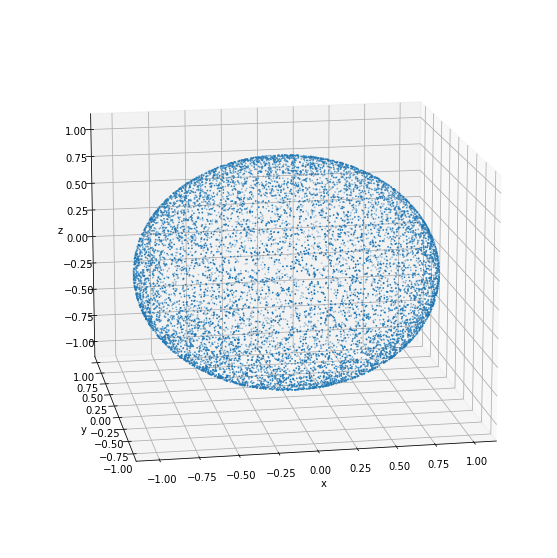

In [5]:
#%matplotlib #uncomment to plot in interactive mode
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter(sample[:,0],sample[:, 1] , sample[:, 2], s=0.6)

ax.view_init(15, -100)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

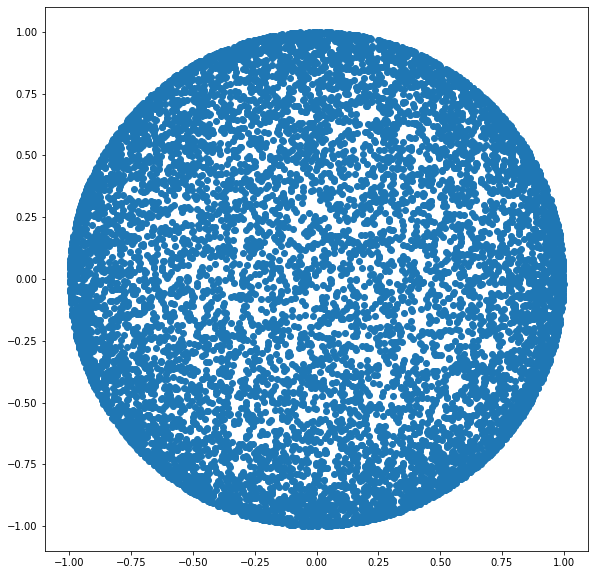

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(sample[:,0], sample[:,1])
ax.set_aspect(1)

In [7]:
#генерация равномерного распределения на dims-мерном шаре
def orb_uniform(dims = 2):
    r = np.power(np.random.uniform(),1/dims)
    return r * sphere_uniform_np(dims)

In [8]:
start = time.time()
sample_1 = np.array([orb_uniform(3) for _ in range(sample_size)])
print("time elapsed: {} seconds".format(time.time()-start))

time elapsed: 0.1800384521484375 seconds


Text(0.5, 0, 'z')

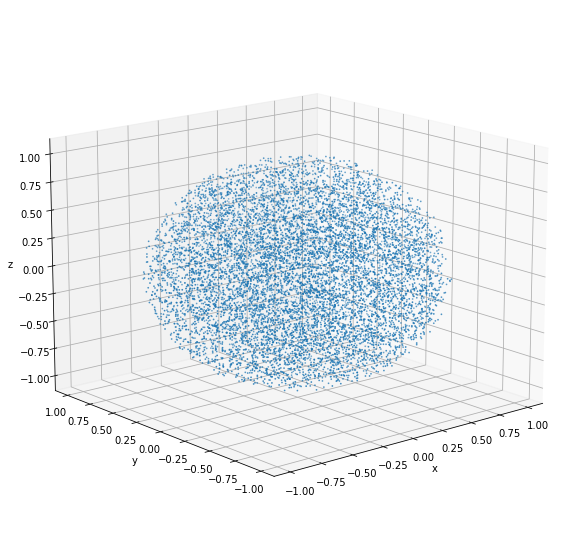

In [9]:
#%matplotlib #uncomment to plot in interactive mode
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter(sample_1[:,0],sample_1[:, 1] , sample_1[:, 2], s=0.6)

ax.view_init(15, -130)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

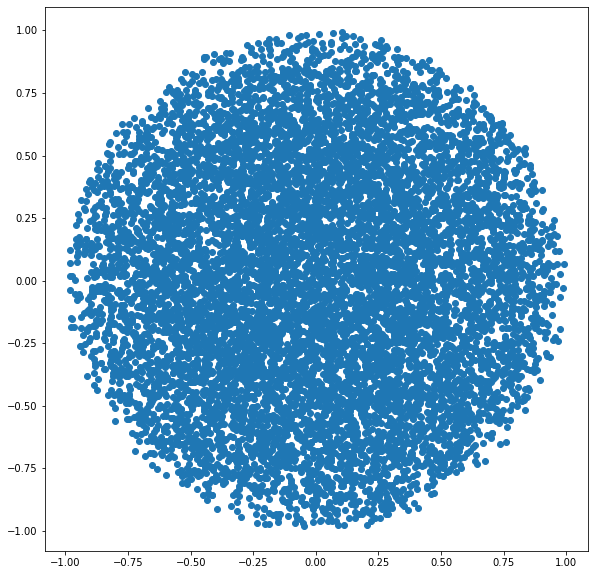

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(sample_1[:,0], sample_1[:,1])
ax.set_aspect(1)